In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings  # Para controlar mensagens de aviso
from scipy.stats import shapiro
from scipy import stats


In [3]:
# Link completo da UCI: https://archive.ics.uci.edu/dataset/186/wine+quality

# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [4]:
# Lê e carrega os arquivos para a memória
df = pd.read_csv(url, sep=';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

# O DataFrame contém 4898 registros e 12 colunas.
# 11 colunas são do tipo float64 (variáveis contínuas) e 1 coluna é do tipo int64 (variável categórica "quality").
# Não há valores nulos no conjunto de dados.
# O uso de memória é de aproximadamente 459.3 KB.
# O dataset está pronto para pré-processamento e modelagem.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.describe()

# O método describe() apresenta estatísticas descritivas para as colunas numéricas do DataFrame.
# A contagem (count) de todas as colunas é 4898, confirmando que não há valores nulos.
# A média (mean) para "fixed acidity" é 6.85, e o desvio padrão (std) é 0.84, indicando uma variação relativamente pequena em torno da média.
# O "residual sugar" tem uma média de 6.39, mas com um desvio padrão alto de 5.07, indicando uma dispersão significativa.
# As colunas "chlorides", "free sulfur dioxide", e "total sulfur dioxide" também apresentam desvios padrão notáveis, sugerindo a presença de valores extremos.
# A coluna "alcohol" tem uma média de 10.51 e um desvio padrão de 1.23, enquanto a variável "quality" varia de 3 a 9, com uma mediana de 6.
# O "residual sugar" tem um valor máximo de 65.8, indicando a presença de um ou mais outliers.
# Os quartis (25%, 50% e 75%) indicam a distribuição dos dados e ajudam a identificar possíveis assimetrias.
# Esses resultados fornecem uma visão inicial da distribuição dos dados e serão úteis para a análise mais detalhada e o pré-processamento.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# Análise de assimetria (skewness) e curtose (kurtosis)
skewness = df.skew()
kurtosis = df.kurtosis()

# A assimetria mede o grau de simetria da distribuição dos dados. Uma distribuição pode ser:
# Assimetria positiva (Skewness > 0): A cauda da distribuição está inclinada para a direita (há mais valores concentrados à esquerda da média).
# Assimetria negativa (Skewness < 0): A cauda da distribuição está inclinada para a esquerda (há mais valores concentrados à direita da média).
# Assimetria próxima de 0: A distribuição é aproximadamente simétrica.
print("Assimetria (Skewness):\n", skewness)

# A curtose mede a "altura" das caudas da distribuição. Ela indica a propensão da distribuição a ter valores extremos (outliers).
# Curtose positiva (Kurtosis > 3): Distribuição mais alongada, com caudas pesadas (mais outliers).
# Curtose negativa (Kurtosis < 3): Distribuição achatada, com caudas leves (menos outliers).
# Curtose próxima de 3: Distribuição normal.
print("\nCurtose:\n", kurtosis)

Assimetria (Skewness):
 fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

Curtose:
 fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64


In [9]:
# Método de Z-score para identificar outliers.
z = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = np.where(z > 3)  # Identifica valores além de 3 desvios padrão
print("Outliers identificados:\n", outliers)


Outliers identificados:
 (array([  17,   20,   23,   40,   41,   54,   72,   98,  147,  154,  169,
        178,  182,  191,  194,  195,  196,  207,  207,  221,  227,  230,
        250,  251,  253,  268,  269,  271,  294,  294,  296,  315,  325,
        325,  339,  358,  372,  395,  405,  445,  450,  470,  484,  508,
        525,  531,  556,  600,  646,  659,  683,  687,  687,  700,  729,
        740,  745,  757,  758,  759,  771,  772,  774,  775,  820,  821,
        827,  830,  834,  852,  854,  859,  866,  873,  873,  876,  877,
        878,  926,  946,  948,  974,  979,  979,  980,  980, 1014, 1016,
       1024, 1029, 1034, 1034, 1034, 1036, 1040, 1051, 1051, 1053, 1123,
       1124, 1152, 1158, 1163, 1171, 1178, 1180, 1214, 1217, 1217, 1228,
       1229, 1239, 1245, 1245, 1250, 1254, 1254, 1255, 1257, 1263, 1272,
       1282, 1293, 1294, 1304, 1304, 1307, 1309, 1312, 1326, 1335, 1352,
       1369, 1369, 1372, 1373, 1385, 1386, 1394, 1401, 1417, 1417, 1418,
       1419, 1423, 1423, 

In [10]:
# Cria uma lista de tuplas com (linha, coluna) para cada outlier identificado
outliers_list = [(row, col) for row, col in zip(outliers[0], outliers[1])]

# Ordena a lista de tuplas pelo nome da coluna
outliers_list = sorted(outliers_list, key=lambda x: df.columns[x[1]])

# Exibe os valores dos outliers, agora agrupados por coluna
for row, col in outliers_list:
    print(f"Outlier na linha {row}, coluna {df.columns[col]}: valor = {df.iloc[row, col]}")


Outlier na linha 40, coluna chlorides: valor = 0.172
Outlier na linha 41, coluna chlorides: valor = 0.173
Outlier na linha 54, coluna chlorides: valor = 0.147
Outlier na linha 194, coluna chlorides: valor = 0.2
Outlier na linha 195, coluna chlorides: valor = 0.197
Outlier na linha 196, coluna chlorides: valor = 0.197
Outlier na linha 315, coluna chlorides: valor = 0.132
Outlier na linha 484, coluna chlorides: valor = 0.346
Outlier na linha 525, coluna chlorides: valor = 0.114
Outlier na linha 531, coluna chlorides: valor = 0.186
Outlier na linha 600, coluna chlorides: valor = 0.18
Outlier na linha 683, coluna chlorides: valor = 0.24
Outlier na linha 687, coluna chlorides: valor = 0.29
Outlier na linha 729, coluna chlorides: valor = 0.185
Outlier na linha 771, coluna chlorides: valor = 0.13
Outlier na linha 772, coluna chlorides: valor = 0.135
Outlier na linha 775, coluna chlorides: valor = 0.115
Outlier na linha 859, coluna chlorides: valor = 0.17
Outlier na linha 877, coluna chlorides

In [11]:
# Teste de Shapiro-Wilk para normalidade:
# - Valor-p > 0.05: indica que a variável segue uma distribuição normal (não rejeitamos a hipótese nula de normalidade).
# - Valor-p < 0.05: indica que a variável não segue uma distribuição normal (rejeitamos a hipótese nula).
for column in df.select_dtypes(include=[np.number]).columns:
    stat, p = shapiro(df[column])
    print(f'Teste de Shapiro-Wilk para {column}: p-value={p}')


Teste de Shapiro-Wilk para fixed acidity: p-value=1.1501523036992451e-27
Teste de Shapiro-Wilk para volatile acidity: p-value=4.5867977211289734e-48
Teste de Shapiro-Wilk para citric acid: p-value=1.0131795882390019e-44
Teste de Shapiro-Wilk para residual sugar: p-value=2.820711554872405e-51
Teste de Shapiro-Wilk para chlorides: p-value=2.140584304591907e-75
Teste de Shapiro-Wilk para free sulfur dioxide: p-value=3.857850118366439e-40
Teste de Shapiro-Wilk para total sulfur dioxide: p-value=4.38345818291574e-19
Teste de Shapiro-Wilk para density: p-value=1.7808979721164475e-36
Teste de Shapiro-Wilk para pH: p-value=6.505518567470481e-20
Teste de Shapiro-Wilk para sulphates: p-value=1.8219789367322782e-37
Teste de Shapiro-Wilk para alcohol: p-value=2.5690137494152616e-36
Teste de Shapiro-Wilk para quality: p-value=1.3401111000219397e-50


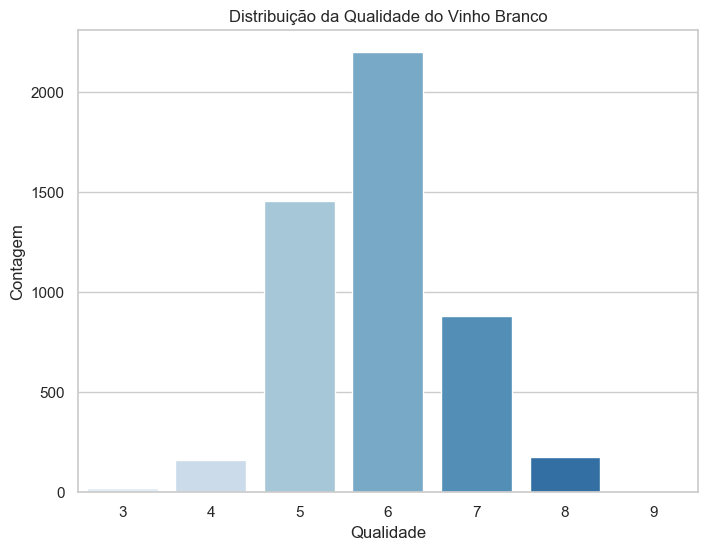

In [12]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Distribuição da qualidade do vinho branco
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='Blues')
plt.title('Distribuição da Qualidade do Vinho Branco')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()

# A distribuição de qualidade dos vinhos brancos é desbalanceada, com a maioria concentrada nas notas 5, 6 e 7.
# A qualidade 6 é a mais comum, seguida por 5 e 7, enquanto as qualidades 3, 4, 8 e 9 têm poucas amostras.

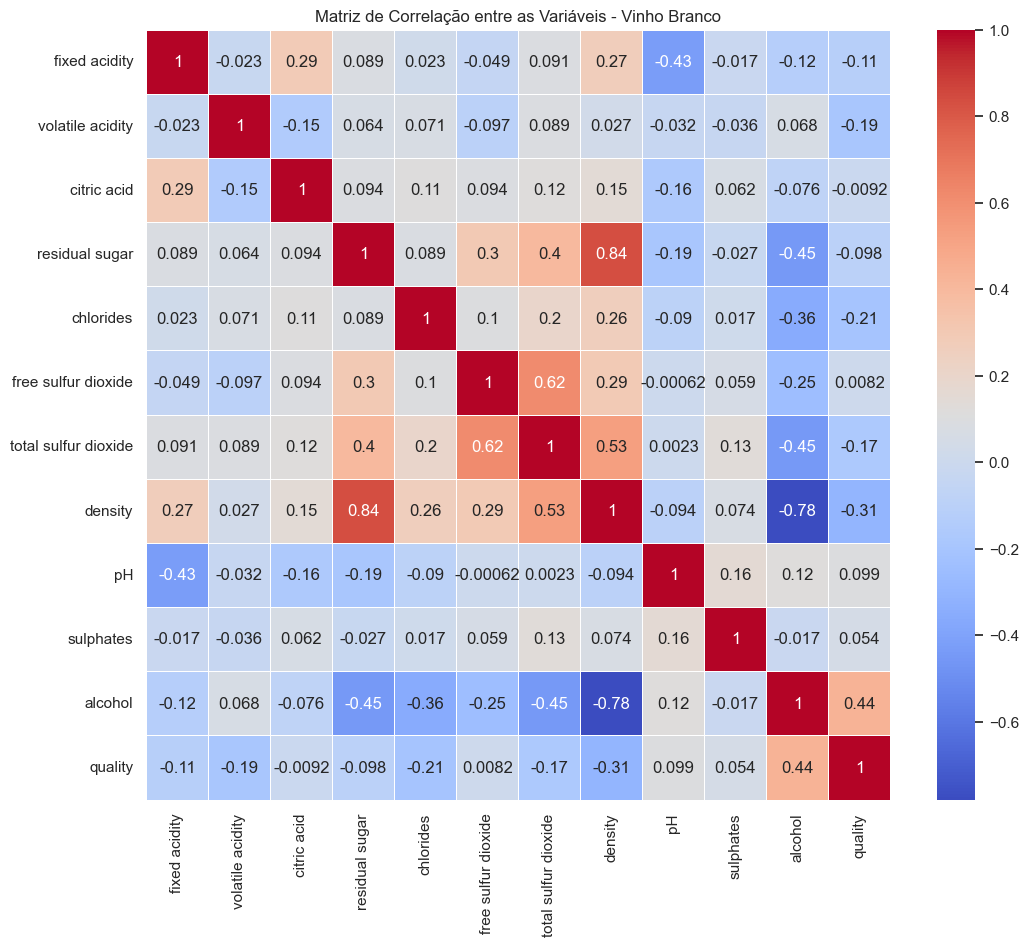

In [13]:
# Matriz de correlação para vinhos brancos
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis - Vinho Branco')
plt.show()

# A matriz de correlação mostra a relação entre as variáveis do vinho branco.
# Density e residual sugar estão altamente correlacionadas (0.84), indicando que o açúcar residual aumenta a densidade.
# Total sulfur dioxide e free sulfur dioxide apresentam uma correlação moderada (0.62), o que é esperado, já que o dióxido de enxofre livre faz parte do total de dióxido de enxofre.
# Density e total sulfur dioxide também têm uma correlação moderada (0.53), indicando que vinhos com maior dióxido de enxofre tendem a ser mais densos.
# A variável alcohol tem a correlação mais forte com a qualidade (0.44), sugerindo que vinhos com maior teor alcoólico tendem a ter melhor qualidade.
# Volatile acidity (-0.19) e chlorides (-0.21) têm correlações negativas com a qualidade, sugerindo que altos níveis dessas variáveis podem estar associados a vinhos de qualidade inferior.

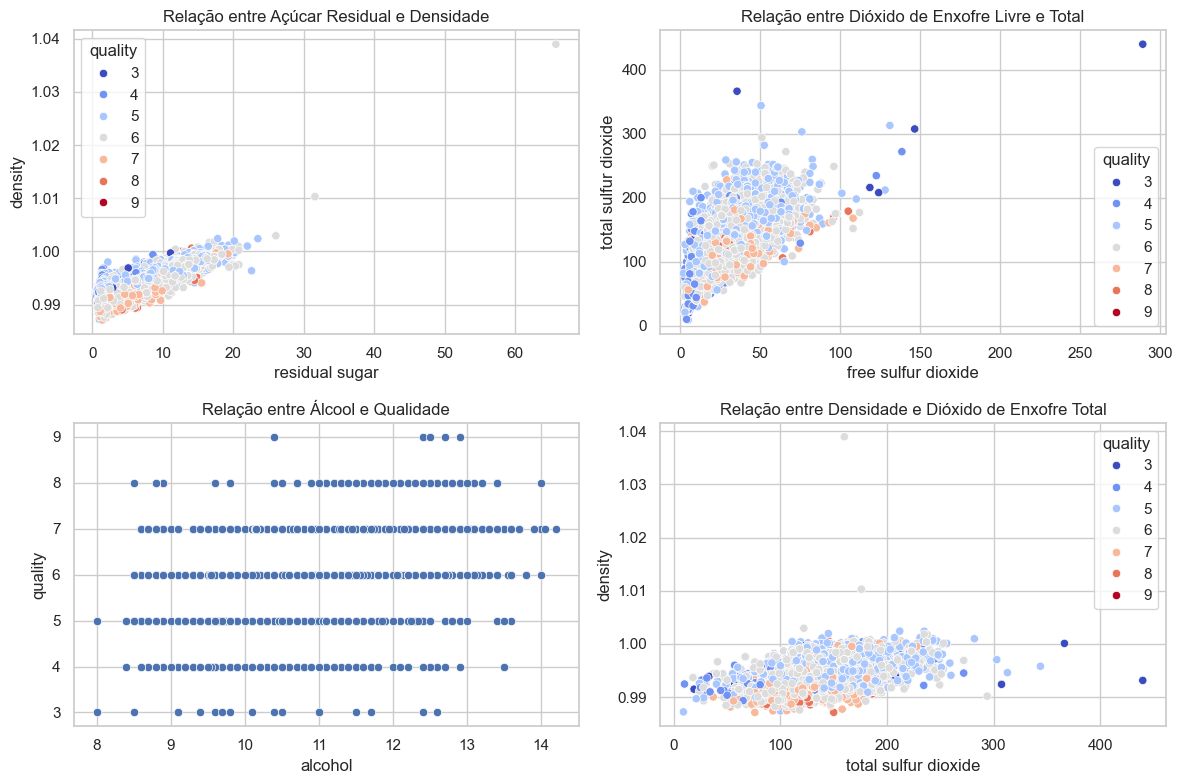

In [14]:
warnings.filterwarnings("ignore", category=UserWarning)

# Scatterplot 1: Relação entre Açúcar Residual e Densidade
# Resumo: Existe uma forte correlação positiva (0.84) entre açúcar residual e densidade.
# Vinhos com mais açúcar residual são mais densos, o que é esperado, pois o açúcar aumenta a densidade.
# Vinhos de qualidade superior (cores mais quentes) tendem a ter menos açúcar residual, sugerindo que vinhos mais secos são preferidos.
plt.subplot(2, 2, 1)
sns.scatterplot(x='residual sugar', y='density', data=df, hue='quality', palette='coolwarm')
plt.title('Relação entre Açúcar Residual e Densidade')

# Scatterplot 2: Relação entre Dióxido de Enxofre Livre e Total
# Resumo: Correlação moderada (0.62) entre dióxido de enxofre livre e total, indicando que quanto mais SO2 livre, mais SO2 total.
# Não há uma relação clara com a qualidade, mas vinhos com mais dióxido de enxofre podem ser mais conservados.
# A variabilidade da qualidade parece estar menos associada ao nível de SO2.
plt.subplot(2, 2, 2)
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, hue='quality', palette='coolwarm')
plt.title('Relação entre Dióxido de Enxofre Livre e Total')

# Scatterplot 3: Relação entre Álcool e Qualidade
# Resumo: Correlação positiva moderada (0.44) entre álcool e qualidade, sugerindo que vinhos com maior teor alcoólico tendem a ser de melhor qualidade.
# A maioria dos vinhos de alta qualidade tem níveis de álcool acima de 11%, indicando que o álcool pode ser um fator importante na percepção da qualidade.
plt.subplot(2, 2, 3)
sns.scatterplot(x='alcohol', y='quality', data=df, palette='coolwarm')
plt.title('Relação entre Álcool e Qualidade')

# Scatterplot 4: Relação entre Densidade e Dióxido de Enxofre Total
# Resumo: Correlação moderada (0.53) entre densidade e dióxido de enxofre total.
# Vinhos com maior densidade tendem a ter mais dióxido de enxofre total, o que pode estar relacionado à conservação de vinhos mais doces ou encorpados.
plt.subplot(2, 2, 4)
sns.scatterplot(x='total sulfur dioxide', y='density', data=df, hue='quality', palette='coolwarm')
plt.title('Relação entre Densidade e Dióxido de Enxofre Total')

plt.tight_layout()
plt.show()


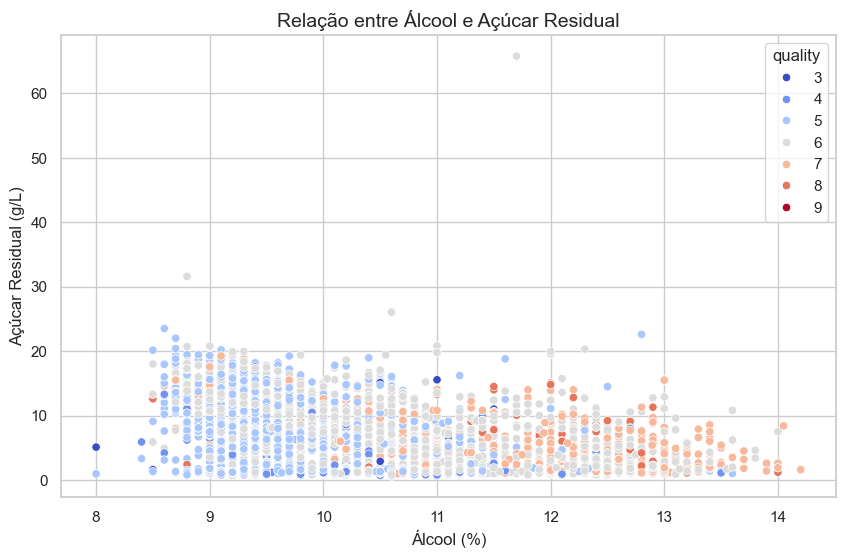

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de dispersão entre Álcool e Açúcar Residual, colorido pela Qualidade
sns.scatterplot(x='alcohol', y='residual sugar', hue='quality', data=df, palette='coolwarm')

# Adicionar títulos e rótulos
plt.title('Relação entre Álcool e Açúcar Residual', fontsize=14)
plt.xlabel('Álcool (%)', fontsize=12)
plt.ylabel('Açúcar Residual (g/L)', fontsize=12)

# Exibir o gráfico
plt.show()


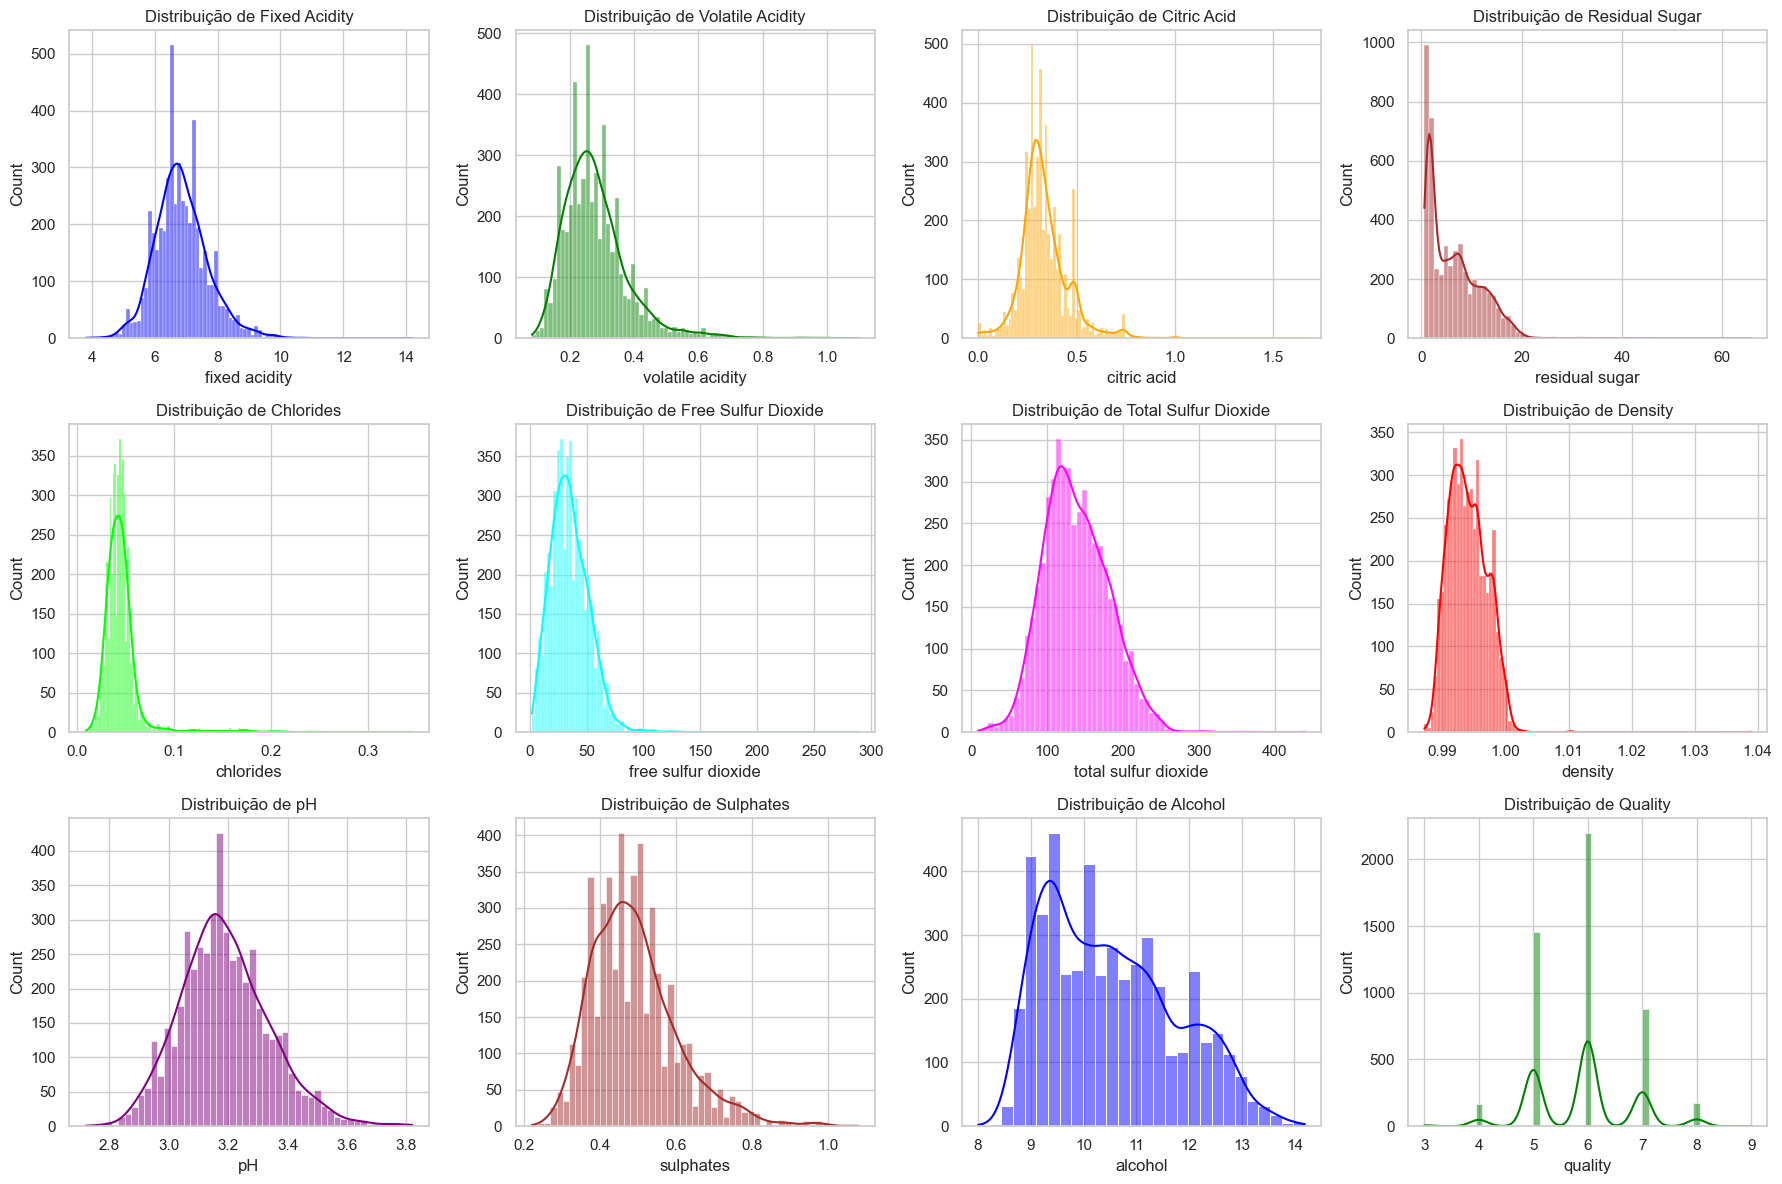

In [16]:
# Criação dos gráficos de distribuição para todas as variáveis restantes no dataset de vinho branco

plt.figure(figsize=(18, 12))

# Distribuições das variáveis solicitadas

plt.subplot(3, 4, 1)
sns.histplot(df['fixed acidity'], kde=True, color='blue')
plt.title('Distribuição de Fixed Acidity')

plt.subplot(3, 4, 2)
sns.histplot(df['volatile acidity'], kde=True, color='green')
plt.title('Distribuição de Volatile Acidity')

plt.subplot(3, 4, 3)
sns.histplot(df['citric acid'], kde=True, color='orange')
plt.title('Distribuição de Citric Acid')

plt.subplot(3, 4, 4)
sns.histplot(df['residual sugar'], kde=True, color='brown')
plt.title('Distribuição de Residual Sugar')

plt.subplot(3, 4, 5)
sns.histplot(df['chlorides'], kde=True, color='lime')
plt.title('Distribuição de Chlorides')

plt.subplot(3, 4, 6)
sns.histplot(df['free sulfur dioxide'], kde=True, color='cyan')
plt.title('Distribuição de Free Sulfur Dioxide')

plt.subplot(3, 4, 7)
sns.histplot(df['total sulfur dioxide'], kde=True, color='magenta')
plt.title('Distribuição de Total Sulfur Dioxide')

plt.subplot(3, 4, 8)
sns.histplot(df['density'], kde=True, color='red')
plt.title('Distribuição de Density')

plt.subplot(3, 4, 9)
sns.histplot(df['pH'], kde=True, color='purple')
plt.title('Distribuição de pH')

plt.subplot(3, 4, 10)
sns.histplot(df['sulphates'], kde=True, color='brown')
plt.title('Distribuição de Sulphates')

plt.subplot(3, 4, 11)
sns.histplot(df['alcohol'], kde=True, color='blue')
plt.title('Distribuição de Alcohol')

plt.subplot(3, 4, 12)
sns.histplot(df['quality'], kde=True, color='green')
plt.title('Distribuição de Quality')

plt.tight_layout()
plt.show()


# Comentário sobre as distribuições das variáveis contínuas:
# 1 Fixed Acidity: A maioria dos vinhos tem acidez fixa entre 6 e 8, com uma distribuição levemente assimétrica à direita.
# 2 Volatile Acidity: A acidez volátil tem uma distribuição concentrada em torno de 0.3, com uma cauda longa à direita.
# 3 Citric Acid: A distribuição de ácido cítrico é assimétrica, com a maioria dos vinhos apresentando baixos níveis de ácido cítrico (em torno de 0.25).
# 4 Residual Sugar: A maior parte dos vinhos tem níveis baixos de açúcar residual, mas há uma cauda longa com valores elevados.
# 5 Chlorides: A distribuição é fortemente assimétrica, com a maioria dos vinhos tendo níveis muito baixos de cloretos.
# 6 Free Sulfur Dioxide: A maioria dos vinhos tem entre 20 e 50 de dióxido de enxofre livre.
# 7 Total Sulfur Dioxide: A distribuição está concentrada em torno de 100 a 150 de dióxido de enxofre total, com uma cauda à direita.
# 8 Density: A densidade dos vinhos está concentrada entre 0.99 e 1.01, com pouca variabilidade.
# 9 pH: A distribuição do pH é aproximadamente normal, com a maioria dos vinhos em torno de 3.2.
# 10 Sulphates: A distribuição de sulfatos é levemente assimétrica, com a maioria dos vinhos concentrados entre 0.4 e 0.6.
# 11 Alcohol: A distribuição do álcool é assimétrica à direita, com a maioria dos vinhos entre 9% e 11% de álcool.
# 12 Quality: A qualidade dos vinhos segue uma distribuição desbalanceada, com a maioria das notas concentradas em 5, 6 e 7.

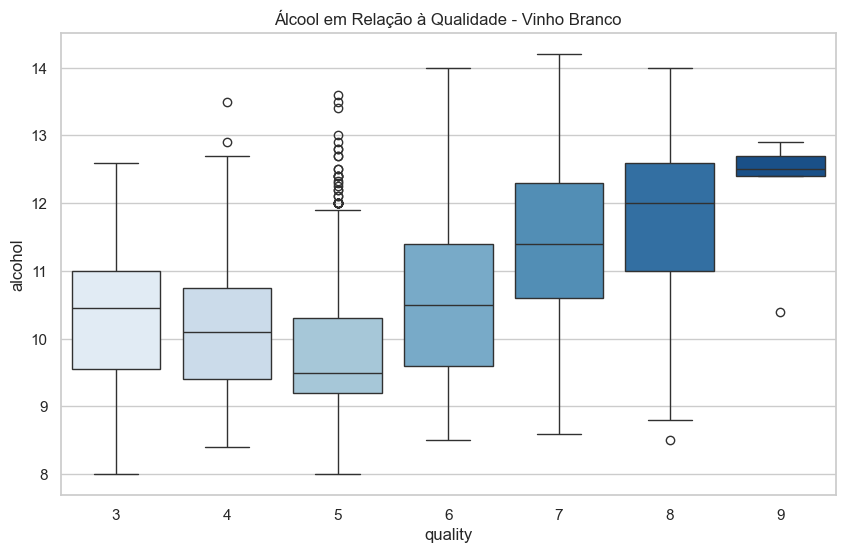

In [17]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Boxplot para verificar relação entre álcool e qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Blues')
plt.title('Álcool em Relação à Qualidade - Vinho Branco')
plt.show()

#   Ánalise do BoxPlot:
# - O gráfico mostra uma tendência de aumento no teor alcoólico conforme a qualidade do vinho aumenta.
# - Vinhos de qualidade 3 a 5 apresentam teores alcoólicos mais baixos, com medianas entre 10% e 11%.
# - A partir da qualidade 6, há um aumento perceptível no teor alcoólico, com medianas próximas de 12% ou mais.
# - Para vinhos de qualidade 8 e 9, o teor alcoólico é ainda maior e mais concentrado, sugerindo que vinhos com maior teor alcoólico tendem a ser classificados com notas mais altas.
# - A variabilidade no teor alcoólico é maior para vinhos de qualidade 6 a 8, enquanto a qualidade 9 tem uma distribuição mais estreita, sugerindo menor variação.
# - Outliers são visíveis, especialmente em vinhos de qualidade 5, indicando que alguns vinhos dessa qualidade possuem níveis de álcool significativamente maiores do que o esperado para esse grupo.
# - Esse padrão pode indicar que o teor alcoólico é um fator importante para a determinação da qualidade do vinho, com vinhos de maior teor alcoólico sendo frequentemente avaliados com uma qualidade superior.


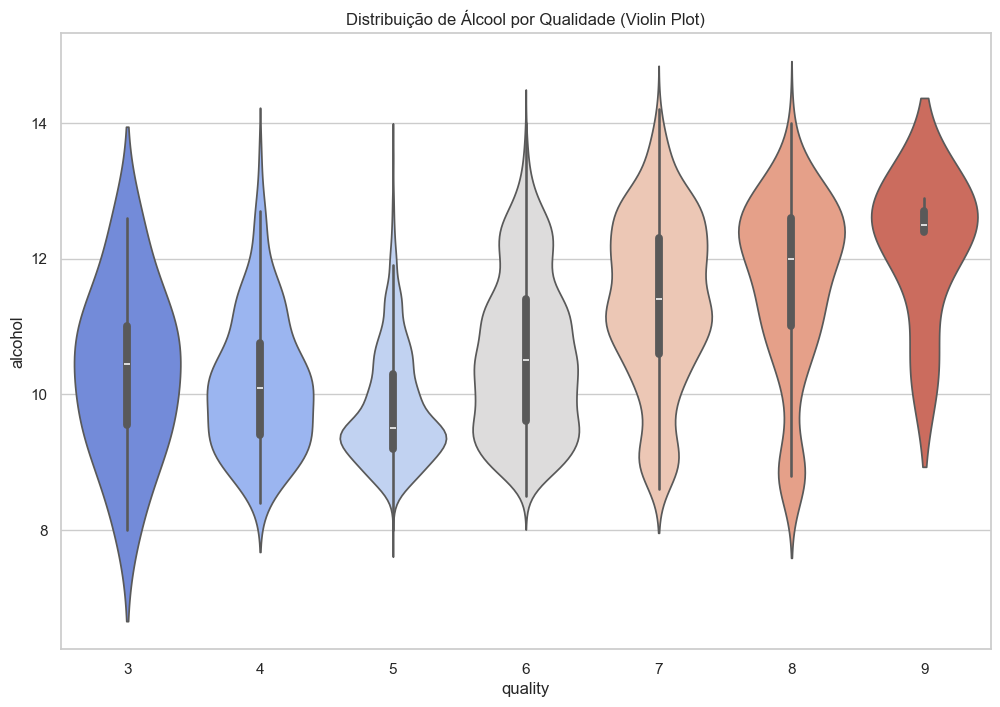

In [18]:
sns.violinplot(x='quality', y='alcohol', data=df, palette="coolwarm")
plt.title('Distribuição de Álcool por Qualidade (Violin Plot)')
plt.show()

# O gráfico mostra que vinhos de maior qualidade (7 a 9) tendem a ter um teor alcoólico mais elevado, com distribuições mais concentradas em torno de valores altos.
# Vinhos de qualidade inferior (3 a 5) apresentam maior variabilidade, especialmente a qualidade 5, que exibe uma distribuição mais dispersa e caudas longas.
# À medida que a qualidade aumenta, a distribuição do álcool se torna mais simétrica e a variabilidade diminui, como observado nas qualidades 7 e 8.
# Vinhos de qualidade 9 têm a distribuição de álcool mais homogênea e concentrada em teores alcoólicos elevados, enquanto as categorias de menor qualidade possuem mais outliers.

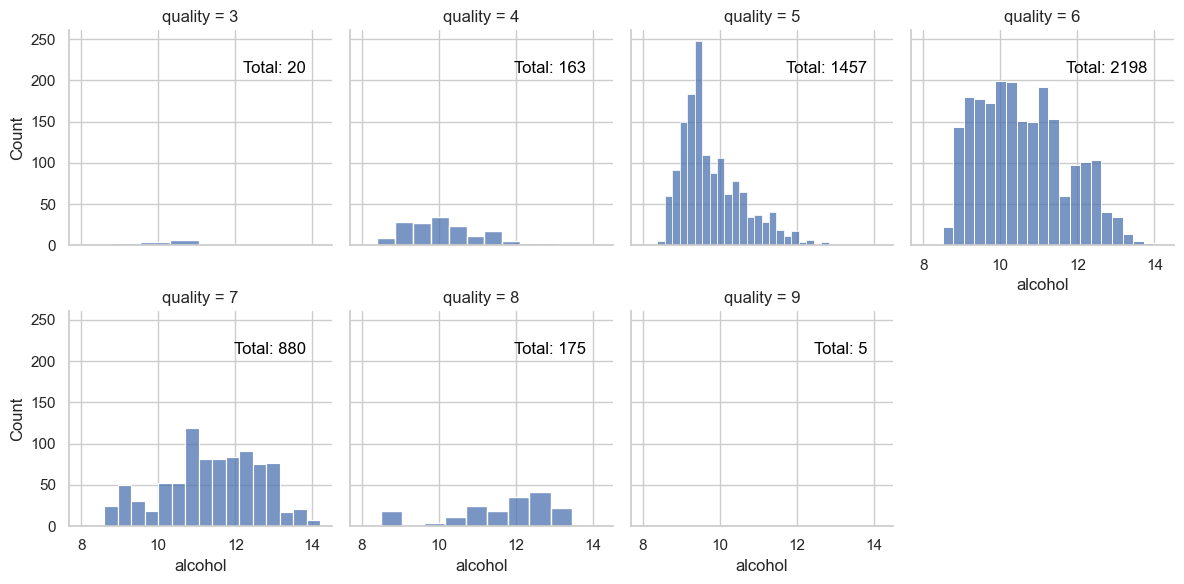

In [19]:
# Adicionar a contagem total de vinhos dentro de cada gráfico
g = sns.FacetGrid(df, col="quality", col_wrap=4)
g.map(sns.histplot, "alcohol")

# Adicionar a contagem total dentro de cada gráfico
for ax in g.axes.flatten():
    count = len(df[df['quality'] == int(ax.get_title().split('=')[-1])])
    ax.text(0.9, 0.8, f"Total: {count}", transform=ax.transAxes, fontsize=12, color='black', ha="right")

plt.show()

# Os gráficos representam a quantidade dos vinhos presentes no dataset de qualidade de (3 a 9) e a quantidade de teor alcólico.
# A contagem total de vinhos em cada categoria é exibida no canto superior direito de cada gráfico.
# Isso destaca o desbalanceamento das classes de qualidade, com a maioria dos vinhos concentrados nas categorias de qualidade (5 a 7).
# As categorias de qualidade 3 e 9 possuem um número significativamente menor de vinhos causando um grande desbalanceamento nos dados.


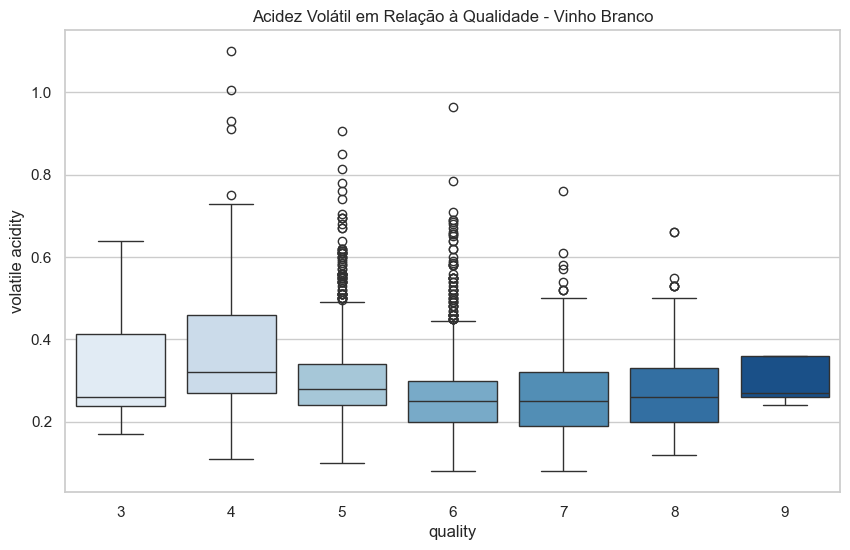

In [20]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Boxplot para verificar a relação entre acidez volátil e qualidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='Blues')
plt.title('Acidez Volátil em Relação à Qualidade - Vinho Branco')
plt.show()

#   Ánalise do BoxPlot:
# - A presença de outliers é visível em quase todas as categorias de qualidade, com maior concentração nos vinhos de qualidade 5 e 6.
# - Para os vinhos de qualidade 4, há alguns outliers extremos, com acidez volátil acima de 0.8 e até 1.0. Esses níveis de acidez são significativamente mais altos que o resto dos vinhos, o que pode indicar exceções ou vinhos com características muito específicas.
# - Nos vinhos de qualidade 5 e 6, há uma grande quantidade de outliers, indicando que muitos vinhos nessa faixa de qualidade têm níveis de acidez volátil consideravelmente mais altos do que o esperado.
# - Para vinhos de qualidade 7 a 9, a quantidade de outliers diminui. Em qualidade 9, não há outliers, e a acidez volátil é mais estável e concentrada.
# - Esses outliers podem representar vinhos com processos de fermentação ou características únicas que fogem ao padrão de acidez volátil para cada nível de qualidade.

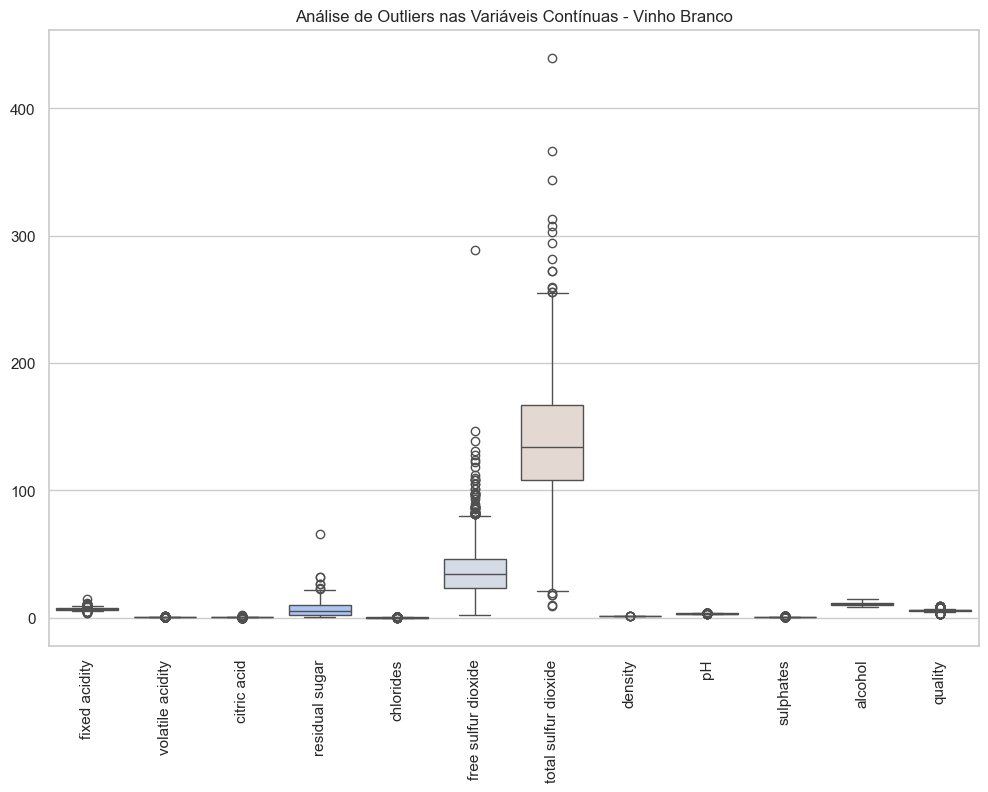

In [21]:
# Análise de outliers para variáveis contínuas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='coolwarm')
plt.title('Análise de Outliers nas Variáveis Contínuas - Vinho Branco')
plt.xticks(rotation=90)
plt.show()

#    Ánalise do BoxPlot:
# - residual sugar: Apresenta vários outliers, com níveis de açúcar residual significativamente mais altos que o normal. 
# - free sulfur dioxide: Contém uma quantidade razoável de outliers, com vinhos apresentando níveis de dióxido de enxofre livre fora do comum.
# - total sulfur dioxide: Esta variável tem a maior quantidade de outliers, com vinhos atingindo níveis superiores a 300, enquanto a maioria fica em torno de 150.
# - alcohol, pH, density, e fixed acidity: Variáveis com poucos ou nenhum outlier visível, o que indica distribuições mais homogêneas.